# scikit-learn overview

scikit-learn is free machine learning library for Python.  
It provides simple and efficient tools for data mining and analysis.

scikit-learn uses a collection of other libraries like:
- NumPy - *Scientific computing in Python*
- SciPy - *Provides numerical routines like optimizations*
- matplotlib - *Plotting/Visualisation library*

  
This notebook gives an overview of Python's scikit-learn library.  


**Outline:**
- Datasets
- Splitting data into test/train/validation sets
- Learning and predicting
- Parameter tuning
- Model persistence

## Loading a sample dataset

In [ ]:
# Provides toy datasets
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

# load the digits dataset
digits = datasets.load_digits()

Understanding iris dataset

About the dataset - 
Iris is a flower. The flower can belong to one of three categories - Setosa, Versicolour, and Virginica. Think of it as
being equivalent to red rose, white rose and pink rose. 

Given the flower's features such as length and width of petals, we need to classify the flower into its correct category.

In [ ]:
!gdown --id 1xQK0_YwxKhaQu-_9SBw-IB13-LFh061a

Downloading...
From: https://drive.google.com/uc?id=1xQK0_YwxKhaQu-_9SBw-IB13-LFh061a
To: /content/iris.jpg
100% 223k/223k [00:00<00:00, 94.2MB/s]


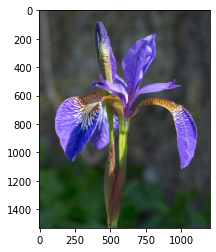

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('iris.jpg')

# Show the original image
plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
pd_df = pd.DataFrame(iris.data)
pd_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# View the dimensions
pd_df.shape

(150, 4)

In [ ]:
pd_df.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [ ]:
pd_df.mean()

0    5.843333
1    3.057333
2    3.758000
3    1.199333
dtype: float64

In [ ]:
pd_df.var()

0    0.685694
1    0.189979
2    3.116278
3    0.581006
dtype: float64

In [ ]:
pd_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Other usefull functions to load data:  
`np.loadtxt()` : https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html   
`np.genfromtxt()` : https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html  
`pd.read_csv()` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html  
Python generator functions for loading large data : https://www.programiz.com/python-programming/generator  

In [ ]:
! gdown --id 1nx8H5b_l7MHdC3dOjE1QmSI4O6O8G7nn

In [ ]:
# missing_data yi aktar
import numpy as np
missing_data = np.genfromtxt("data_missingvalues.txt", missing_values="?", filling_values=0)

In [ ]:
missing_data

array([[ 1., -1.,  0.,  1.,  1., -1.],
       [-1., -1., -1.,  0.,  1.,  1.]])

In [ ]:
np.sum(missing_data[0] > 0)

3

## Splitting data into Train, Test & Validation sets

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.data[:, :2]
y = iris.target

# 20% of data as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 20% of TRAINING data as validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

## Learing and Prediction (using SVM)

In [ ]:
# Import the classifier
from sklearn import svm

# C is a hyper-parameter
clf = svm.SVC(C=10)

# Training a classifier
clf.fit(X_train, y_train)

SVC(C=10)

In [ ]:
y_train

array([2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 0, 1, 1])

API Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
# Predict on the validation set to see accuracy
import numpy as np

predictions = clf.predict(X_valid)
print ('Accuracy = ' + str(np.sum(predictions == y_valid)/len(y_valid)))

Accuracy = 0.8333333333333334


In [ ]:
predictions = clf.predict(X_test)
print ('Accuracy = ' + str(np.sum(predictions == y_test)/len(y_test)))

Accuracy = 0.8


## Parameter tuning

In [ ]:
# How to select the best value of C?
# See the value of C that gives best accuracy on validation data

initial_C = 0.1

C = initial_C
best_acc = 0.0
best_C = initial_C
step_size = 10 # can be toned down for a better prediction

while C < 100:
    clf = svm.SVC(C=C)
    clf.fit(X_train, y_train)
    accuracy = np.sum(clf.predict(X_valid)==y_valid)/len(y_valid)
    print ('Accuracy at C = ' + str(C) + ' is ' + str(accuracy))
    if (accuracy > best_acc):
        best_acc = accuracy
        best_C = C
    C += step_size
print ("")
print ('Best C = ' + str(best_C) + '. It has an accuracy of ' + str(best_acc))

clf = svm.SVC(C=best_C)
clf.fit(X_train, y_train) # you can use X_train + X_valid here too if you feel more data will be helpful
predictions = clf.predict(X_test)

Accuracy at C = 0.1 is 0.25
Accuracy at C = 10.1 is 0.8333333333333334
Accuracy at C = 20.1 is 0.8333333333333334
Accuracy at C = 30.1 is 0.8333333333333334
Accuracy at C = 40.1 is 0.8333333333333334
Accuracy at C = 50.1 is 0.8333333333333334
Accuracy at C = 60.1 is 0.8333333333333334
Accuracy at C = 70.1 is 0.8333333333333334
Accuracy at C = 80.1 is 0.8333333333333334
Accuracy at C = 90.1 is 0.8333333333333334

Best C = 10.1. It has an accuracy of 0.8333333333333334


## Model persistence

In [ ]:
# It is possible to save a model in the scikit by using Python’s built-in persistence model, namely pickle 
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  

SVC()

In [ ]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
pred = clf2.predict(X[0:1])
print(pred)

[0]


To write/load the pickle information to/from a file use `dump()` and `load()` functions.  
API Reference :  
`dump()` : https://docs.python.org/3/library/pickle.html#pickle.dump  
`load()` : https://docs.python.org/3/library/pickle.html#pickle.load

In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on big data

In [ ]:
!pip install mlxtend

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

joblib.dump(clf, '/content/drive/Shareddrives/MGTF495/Lectures/Week_2/Hands_on/filename.pkl')  #.pkl means a pickle file

['/content/drive/Shareddrives/MGTF495/Lectures/Week_2/Hands_on/filename.pkl']

In [ ]:
clf = joblib.load('/content/drive/Shareddrives/MGTF495/Lectures/Week_2/Hands_on/filename.pkl') 

Other type of models such as regressors, clustering mechansims etc. will be discussed later. This module was only to give a brief overview of the capabilities of sklearn